# Kermack-McKendrick SIR Model \[Brauer 2008\]

The following infectious disease spread model uses the Kermack-McKendrick SIR model from Brauer 2008:

$S(t)$ is the number of individuals who are susceptible to the disease, that is,
who are not (yet) infected at time $t$.
$I(t)$ is the number of infected individuals, assumed infectious and able to spread
the disease by contact with susceptibles.
$R(t)$ is the number of individuals who have been infected and then removed from the
possibility of being infected again or of spreading infection.

Diff eq's:
    $$ S'=-\beta SI $$
    $$ I'=\beta SI-\alpha I $$
    $$ R'=\alpha I $$
    
Model assumptions:

    (1) An average member of the population makes contact sufficient to transmit
     infection with betaN others per unit time, where N represents total
     population size (mass action incidence).
     
    (2) Infectives leave the infective class at a rate alphaI per unit time.
    
    (3) There is no entry into or departure from the population, except possibly
     through death from the disease.
    
$R_0$ is the basic reproduction number, which is $\frac{\beta S(0)}{\alpha}$

### Importing packages

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import pandas as pd

### Initializing parameters

Time step (days):

In [2]:
dt = 0.01

Beta: fraction of total population that an average member of the population makes contact with sufficient to transmit infection per unit time.

Units are $[\frac{1}{N}][\frac{1}{t}]$, where we choose N to be individuals and t to be days.

In [3]:
beta = 0.000595

Alpha: the length of the infective period is $\frac{1}{\alpha}$, so $\alpha$ is $\frac{1}{\text{length of infective period}}$

Units are $[\frac{1}{t}]$, where we choose t to be days.

In [4]:
alpha = 0.091

Total time (days)

In [5]:
tottime = 140

### Initializing arrays

In [6]:
niter = int(math.ceil(tottime/dt))
t = np.arange(0, tottime, dt)   
S = np.zeros(niter)
I = np.zeros(niter)

### Initial population values

In [7]:
S[0] = 254
I[0] = 7
N = S[0] + I[0]

### Value of $R_0$

In [8]:
R0 = beta*S[0]/alpha
print(R0)

1.660769230769231


### Euler's Method

In [9]:
for j in range(niter-1):
    dSdt=-(beta)*S[j]*I[j]
    dIdt=(beta)*S[j]*I[j]-alpha*I[j]
    S[j+1] = S[j] + dt*dSdt 
    I[j+1] = I[j] + dt*dIdt  
   
       
R = N-S-I

### Plotting

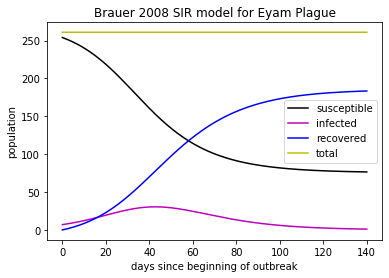

In [10]:
plt.plot(t, S, 'k', label = 'susceptible')
plt.plot(t, I, 'm', label = 'infected')
plt.plot(t, R, 'b', label = 'recovered')
plt.plot(t, R+S+I, 'y', label = 'total')
plt.gca().legend(('susceptible','infected','recovered','total'))
plt.title('Brauer 2008 SIR model for Eyam Plague')
plt.xlabel('days since beginning of outbreak')
plt.ylabel('population')
plt.show()

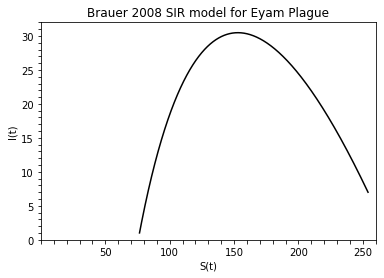

In [44]:
plt.plot(S, I, 'k')
plt.title('Brauer 2008 SIR model for Eyam Plague')
plt.xlabel('S(t)')
plt.ylabel('I(t)')
plt.xlim(0, 260)
plt.ylim(0, 32)
plt.xticks(np.arange(0, 270, step=10), 
           [' ',' ',' ',' ',' ', 50,' ',' ',' ',' ',100,' ',' ',' ',' ',150,
            ' ',' ',' ',' ', 200,' ',' ',' ',' ', 250, ' '])
plt.yticks(np.arange(0, 33, step=1),
           [0,' ',' ',' ',' ',5,' ',' ',' ',' ',10,' ',' ',' ',' ',15,
            ' ',' ',' ',' ',20,' ',' ',' ',' ',25,' ',' ',' ',' ',30,' ', ' '])
plt.show()

### Writing results to csv format

In [28]:
df = pd.DataFrame({'days':t, 'infected':I, 'susceptible':S,
                   'recovered':R, 'total':N})

In [29]:
df.head()

,days,infected,susceptible,recovered,total
0,0.00,7.000000,254.000000,0.000000,261.0
1,0.01,7.004209,253.989421,0.006370,261.0
2,0.02,7.008420,253.978836,0.012744,261.0
3,0.03,7.012634,253.968245,0.019121,261.0
4,0.04,7.016849,253.957648,0.025503,261.0


In [30]:
df

,days,infected,susceptible,recovered,total
0,0.00,7.000000,254.000000,0.000000,261.0
1,0.01,7.004209,253.989421,0.006370,261.0
2,0.02,7.008420,253.978836,0.012744,261.0
3,0.03,7.012634,253.968245,0.019121,261.0
4,0.04,7.016849,253.957648,0.025503,261.0
...,...,...,...,...,...
13995,139.95,1.015349,76.539824,183.444827,261.0
13996,139.96,1.014888,76.539362,183.445751,261.0
13997,139.97,1.014426,76.538900,183.446674,261.0
13998,139.98,1.013965,76.538438,183.447597,261.0


In [32]:
df.days

0          0.00
1          0.01
2          0.02
3          0.03
4          0.04
          ...  
13995    139.95
13996    139.96
13997    139.97
13998    139.98
13999    139.99
Name: days, Length: 14000, dtype: float64

In [36]:
df.loc[df.days.isin(range(140))]

,days,infected,susceptible,recovered,total
0,0.0,7.000000,254.000000,0.000000,261.0
100,1.0,7.431331,252.912400,0.656269,261.0
200,2.0,7.883997,251.763256,1.352747,261.0
300,3.0,8.358366,250.550240,2.091393,261.0
400,4.0,8.854717,249.271087,2.874195,261.0
...,...,...,...,...,...
13500,135.0,1.271172,76.796975,182.931852,261.0
13600,136.0,1.214833,76.740195,183.044972,261.0
13700,137.0,1.160952,76.685971,183.153077,261.0
13800,138.0,1.109426,76.634189,183.256385,261.0


In [39]:
df.to_csv('Practice.csv')

In [42]:
first_data_set = pd.read_csv('Practice.csv', index_col=0)

In [43]:
first_data_set.head()

,days,infected,susceptible,recovered,total
0,0.00,7.000000,254.000000,0.000000,261.0
1,0.01,7.004209,253.989421,0.006370,261.0
2,0.02,7.008420,253.978836,0.012744,261.0
3,0.03,7.012634,253.968245,0.019121,261.0
4,0.04,7.016849,253.957648,0.025503,261.0


In [58]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

dt = 0.01

@interact(tottime=(100,750,5), betaprime=(0,1,0.005), infectionlength=(1,40,1),
       initial_sus_pop=(0,10000,1),initial_inf_pop=(0,10000,1))
def SIR_model(tottime=140, betaprime=0.155, infectionlength=11, initial_sus_pop=254, initial_inf_pop=7):
    
    niter = int(math.ceil(tottime/dt))
    t = np.arange(0, tottime, dt)   
    S = np.zeros(niter)
    I = np.zeros(niter)
    R = np.zeros(niter)
    
     
    S[0] = initial_sus_pop
    I[0] = initial_inf_pop
    N = S[0] + I[0]
    
    beta = betaprime/N #betaprime is the beta from the old model
    
    alpha = 1/infectionlength
    
    R0 = beta*S[0]/alpha

    for j in range(niter-1):
        dSdt = -beta*S[j]*I[j]
        dIdt = beta*S[j]*I[j] - alpha*I[j]
        dRdt = alpha*I[j]
        S[j+1] = S[j] + dt*dSdt
        I[j+1] = I[j] + dt*dIdt
        R[j+1] = R[j] + dt*dRdt
    N = S + I + R
    
    print('tottime = ' + str(tottime), 'beta = ' + str(beta), 'alpha = ' + str(alpha),
              'Initial Sus Pop = ' + str(initial_sus_pop),
              'Initial Inf Pop = ' + str(initial_inf_pop),'R0 = ' + str(R0))
    
    for n in range(2):
        if n == 0:
            plt.plot(t, S)
            plt.plot(t, I)
            plt.plot(t, R)
            plt.plot(t, N)
            plt.legend(['susceptible', 'infected', 'recovered', 'total'], loc = 'upper right')
            plt.title('Brauer SIR model')
            plt.xlabel('days since beginning of outbreak')
            plt.ylabel('population')
            plt.show()
        else:
            plt.plot(S, I)
            plt.title('Brauer SIR model Phase Space')
            plt.xlabel('S(t)')
            plt.ylabel('I(t)')
            plt.show()
    
    return plt.show()

interactive(children=(IntSlider(value=140, description='tottime', max=750, min=100, step=5), FloatSlider(value…